Model: "Gaussiano"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 196, 16)        │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 98, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 96, 32)         │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 48, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │        49,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,914 (198.88 KB)

 Trainable params: 50,914 (198.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 39183.9961 - mae: 117.5650 - val_loss: 1817.0056 - val_mae: 35.0932
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 735.1946 - mae: 21.1363 - val_loss: 303.6283 - val_mae: 14.0849
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 245.7283 - mae: 12.5293 - val_loss: 210.0234 - val_mae: 11.6154
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 197.7285 - mae: 11.1172 - val_loss: 241.2196 - val_mae: 12.4662
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 167.2437 - mae: 10.2968 - val_loss: 193.2064 - val_mae: 11.2218
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 179.0974 - mae: 10.5803 - val_loss: 148.4536 - val_mae: 9.8404
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 127.3770 - mae: 9.0175 - val_loss: 148.2710 - val_mae: 9.8210
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 125.9442 - mae: 8.9796 - val_loss: 224.9950 - val_mae: 12.1003
Epoch 9/50
50/50 ━━━━━━━

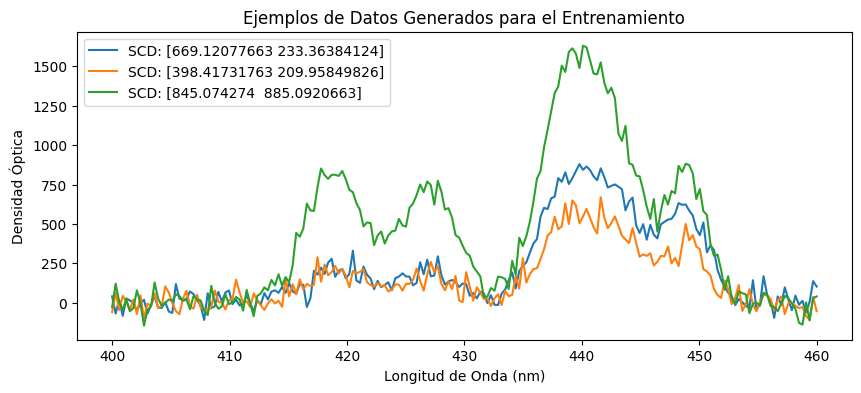

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#GENERAR LOS DATOS SINTÉTICOS

def seccion_eficaz_simulada(__n_gases, __longitudes_de_onda, __n_pixeles):

    secciones_eficaces_simuladas = np.zeros((__n_gases,__n_pixeles))

    #Parámetos de las gaussianas
    for i in range(__n_gases):
        amplitud_1 = np.random.uniform(0, 1)
        amplitud_2 = np.random.uniform(0, 1)
        amplitud_3 = np.random.uniform(0, 1)

        lambda_pico_1 = np.random.randint(410, 450)
        lambda_pico_2 = np.random.randint(410, 450)
        lambda_pico_3 = np.random.randint(410, 450)

        desviacion_estandar_1 = np.random.uniform(1.5, 3.1)
        desviacion_estandar_2 = np.random.uniform(1.5, 3.1)
        desviacion_estandar_3 = np.random.uniform(1.5, 3.1)

        #Definiendo las gaussianas
        gaussiana_1 = amplitud_1 * np.exp(-0.5 * ((__longitudes_de_onda - lambda_pico_1)/desviacion_estandar_1)**2)
        gaussiana_2 = amplitud_2 * np.exp(-0.5 * ((__longitudes_de_onda - lambda_pico_2)/desviacion_estandar_2)**2)
        gaussiana_3 = amplitud_3 * np.exp(-0.5 * ((__longitudes_de_onda - lambda_pico_3)/desviacion_estandar_3)**2)
        gaussiana_def = gaussiana_1 + gaussiana_2 + gaussiana_3

        secciones_eficaces_simuladas[i,:] = gaussiana_def

    return secciones_eficaces_simuladas

def generar_datos(__n_gases, __n_muestras, __n_pixeles):

    #Definiendo variables
    longitudes_de_onda    = np.linspace(400, 460, __n_pixeles)
    seccion_eficaz        = seccion_eficaz_simulada(__n_gases, longitudes_de_onda, __n_pixeles)
    Datos                 = np.zeros((__n_muestras, __n_pixeles))
    Slant_Colum_Densities = np.zeros((__n_gases, __n_muestras))

    #Generando los datos
    for i in range(__n_muestras):
        densidad_optica = np.zeros((__n_muestras, __n_pixeles))
        for j in range(__n_gases):
            slant_colum_density = np.random.uniform(0, 1000)
            Slant_Colum_Densities[j, i] = slant_colum_density
            densidad_optica[i,:] += seccion_eficaz[j, :] * slant_colum_density

        ruido = np.random.normal(0, 50, __n_pixeles)
        Datos[i, :] = densidad_optica[i] + ruido

    return Datos, Slant_Colum_Densities, longitudes_de_onda

#Definiendo más variables
n_gases = 2
n_muestras       = 2000
n_pixeles        = 200

#Gernerando y guardando los datos
Datos_raw, Real_Slant_Colum_Densities, longitudes_de_onda = generar_datos(n_gases, n_muestras, n_pixeles)

#Formateando datos para la CNN
Datos_train = Datos_raw.reshape(n_muestras, n_pixeles, 1)

#CONSTRUCCIÓN DE LA RED NEURONAL

def construir_modelo(__n_gases):

    #Nombre
    __modelo = models.Sequential(name = "Gaussiano")

    #Dimensiones
    __modelo.add(layers.Input(shape = (n_pixeles, 1)))

    #Capas convolucionales
    __modelo.add(layers.Conv1D(filters = 16, kernel_size = 5, activation = 'relu'))
    __modelo.add(layers.MaxPooling1D(pool_size = 2))

    __modelo.add(layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'))
    __modelo.add(layers.MaxPooling1D(pool_size = 2))

    __modelo.add(layers.Flatten())

    #Capas densas
    __modelo.add(layers.Dense(32, activation = 'relu'))
    #__modelo.add(layers.Dropout(0.3))
    __modelo.add(layers.Dense(__n_gases, activation = 'linear'))

    #Compilación
    __modelo.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

    return __modelo

modelo = construir_modelo(n_gases)
modelo.summary()
Real_Slant_Colum_Densities_Trans = Real_Slant_Colum_Densities.T
#ENTRENAMIENTO

historial = modelo.fit(
    Datos_train,
    Real_Slant_Colum_Densities_Trans,
    epochs           = 50,
    batch_size       = 32,
    validation_split = 0.2,
    verbose          = 1
)

#ERRORES
indices_prueba = np.random.randint(0, 2000, 3)

#Graficando ejemplos
plt.figure(figsize = (10, 4))

for i in indices_prueba:
    plt.plot(longitudes_de_onda, Datos_train[i], label = f"SCD: {Real_Slant_Colum_Densities[:, i]}")

plt.title("Ejemplos de Datos Generados para el Entrenamiento")
plt.xlabel("Longitud de Onda (nm)")
plt.ylabel("Densidad Óptica")
plt.legend()
plt.show()

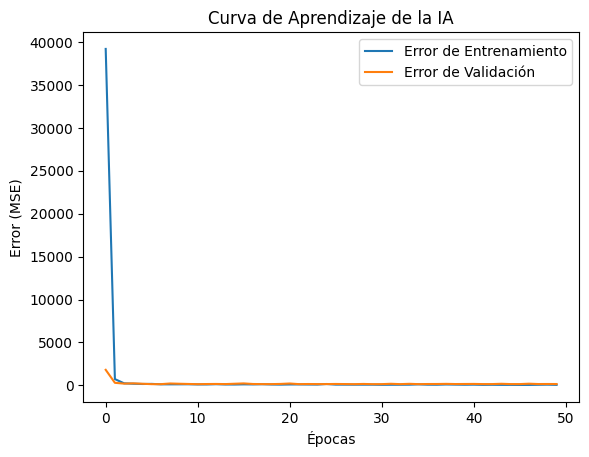

In [14]:
#Graficando Errores y Progresión
plt.plot(historial.history['loss'], label = 'Error de Entrenamiento')
plt.plot(historial.history['val_loss'], label = 'Error de Validación')

plt.title("Curva de Aprendizaje de la IA")
plt.xlabel("Épocas")
plt.ylabel("Error (MSE)")
plt.legend()
plt.show()

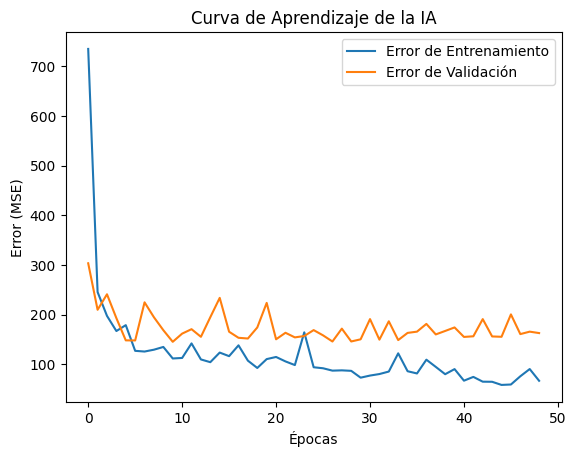

In [15]:
plt.plot(historial.history['loss'][1:], label = 'Error de Entrenamiento')
plt.plot(historial.history['val_loss'][1:], label = 'Error de Validación')

plt.title("Curva de Aprendizaje de la IA")
plt.xlabel("Épocas")
plt.ylabel("Error (MSE)")
plt.legend()
plt.show()

In [17]:
#VALIDACIÓN Y PREDICCIÓN

#Generando y formateando nuevos espectros para la predicción:
n_prediccion = 5


Datos_prediccion, Real_Slant_Colum_Densities_prediccion, pixels = generar_datos(n_prediccion, n_pixeles)
Datos_prediccion_train = Datos_prediccion.reshape(n_prediccion, n_pixeles, 1)

predicciones = modelo.predict(Datos_prediccion_train)

print('\n --- TEST DE PREDICCION ---')
for i in range(n_prediccion):

    error_relativo = (abs(Real_Slant_Colum_Densities_prediccion[i] - predicciones[i][0]) / Real_Slant_Colum_Densities_prediccion[i]) * 100

    print(f'Muestra {i + 1}: ')
    print(f'    Real : {Real_Slant_Colum_Densities_prediccion[i]:.2f} ppm')
    print(f'    IA   : {predicciones[i][0]:.2f} ppm')
    print(f'    Error: {error_relativo:.2f}%')

TypeError: generar_datos() missing 1 required positional argument: '__n_pixeles'